## Imports

In [58]:
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from datetime import datetime
import random

## Checking Spark Context

In [59]:
sc

<SparkContext master=local-cluster[3,2,1024] appName=PySparkShell>

## Importing table Global Land Temperatures By City

In [60]:
df = sqlContext.read.format('com.databricks.spark.csv') \
    .options(header='true', inferschema='true') \
    .load('data/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')
df.createOrReplaceTempView("table1")
spark.sql("select * from table1").show()
spark.sql("select * from table1").printSchema()

+-------------------+-------------------+-----------------------------+-----+-------+--------+---------+
|                 dt| AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+-------------------+-------------------+-----------------------------+-----+-------+--------+---------+
|1743-11-01 00:00:00|              6.068|           1.7369999999999999|Århus|Denmark|  57.05N|   10.33E|
|1743-12-01 00:00:00|               null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-01-01 00:00:00|               null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-02-01 00:00:00|               null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-03-01 00:00:00|               null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-04-01 00:00:00| 5.7879999999999985|           3.6239999999999997|Århus|Denmark|  57.05N|   10.33E|
|1744-05-01 00:00:00|             10.644|           1.2

## Importing table population

In [61]:
df = sqlContext.read.format('com.databricks.spark.csv') \
    .options(header='true', inferschema='true') \
    .load('data/population2.csv')
df.createOrReplaceTempView("table2")
spark.sql("select * from table2").show()
spark.sql("select * from table2").printSchema()

+--------------------+------------+-----------------+--------------+--------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----+----+
|             Country|Country Code|   Indicator Name|Indicator Code|   Y1960|   Y1961|   Y1962|    Y1963|    Y1964|    Y1965|    Y1966|    Y1967|    Y1968|    Y1969|    Y1970|    Y1971|    Y1972|    Y1973|    Y1974|    Y1975|    Y1976|    Y1977|    Y1978|    Y1979|    Y1980|    Y1981|    Y1982|    Y1983|    Y1984|    Y1985|    Y1986|    Y1987|    Y1988|    Y198

## Importing table Global Land Temperatures By Country

In [62]:
df = sqlContext.read.format('com.databricks.spark.csv') \
    .options(header='true', inferschema='true') \
    .load('data/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')
df.createOrReplaceTempView("table3")
spark.sql("Select * from table3").show()
spark.sql("select * from table3").printSchema()

+-------------------+-------------------+-----------------------------+-------+
|                 dt| AverageTemperature|AverageTemperatureUncertainty|Country|
+-------------------+-------------------+-----------------------------+-------+
|1743-11-01 00:00:00| 4.3839999999999995|                        2.294|  Åland|
|1743-12-01 00:00:00|               null|                         null|  Åland|
|1744-01-01 00:00:00|               null|                         null|  Åland|
|1744-02-01 00:00:00|               null|                         null|  Åland|
|1744-03-01 00:00:00|               null|                         null|  Åland|
|1744-04-01 00:00:00|               1.53|                         4.68|  Åland|
|1744-05-01 00:00:00|  6.702000000000001|                        1.789|  Åland|
|1744-06-01 00:00:00| 11.609000000000002|                        1.577|  Åland|
|1744-07-01 00:00:00|             15.342|                         1.41|  Åland|
|1744-08-01 00:00:00|               null

## Function for graph

In [63]:
months = ['Alle maanden','Januari', 'Februari', 'Maart', 'April', 'Mei', 'Juni', 'Juli', 'Augstus', 'September', 'Oktober','November','December']
def widgetsToFigure(steden = ["Antwerp","Dubai", "Athens"],
                   maandIndex = 7,
                   jaren = [1945, 2013]):
    fig = plt.figure(figsize=(15, 5))
    plt1 = fig.add_subplot(111)

    legend = []
    
    for i in range(len(steden)):   
        legend.append(steden[i])
        sqlQuery = ("SELECT dt, AVG(AverageTemperature) as AverageTemperature " + 
              "from table1 " + 
              "where City == '" + steden[i] + "' and " + 
              "dt between '" + str(jaren[0]) + "-01-01' and '" + str(jaren[1]) + "-12-31' and " +
              "dt like '%-" + monthToString(maandIndex) + "-%'" +
              "group by dt, city " + 
              "order by dt")
        #print(sqlQuery)
        #spark.sql(sqlQuery).show()
        data = np.array(spark.sql(sqlQuery).collect())

        x_as = []
        y_as = []

        for i in range(len(data)):
            x_as.append(data[i][1])
            y_as.append(data[i][0])
        plt1.plot(y_as, x_as)
        
    #print(legend)

    plt1.set_title("Gemiddelde temperatuur van " + months[maandIndex] + " per jaar in " + ", ".join([str(x) for x in steden]) + " tussen " + str(jaren[0]) + " en " + str(jaren[1]) )    
    plt1.legend(legend, loc='upper left')

def monthToString(index):
    maand = ""
    if index == 0:
        maand = '%'
    elif index >= 10:
        maand = str(index)
    else:
        maand = str("0" + str(index))
    return maand

## Testing function

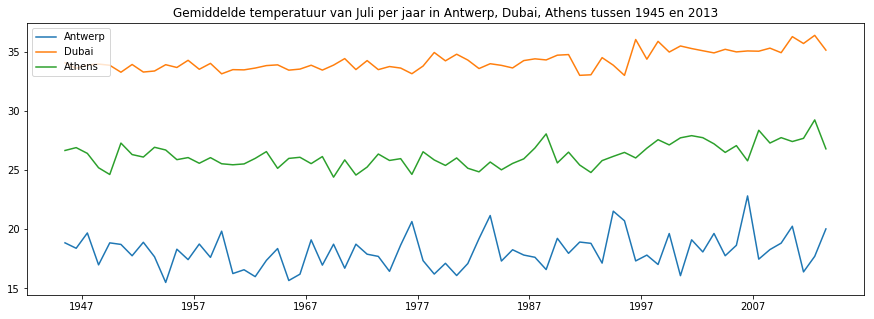

In [90]:
widgetsToFigure()

# Choose a country

In [72]:
countries = []
countries.append(np.array(spark.sql("SELECT DISTINCT Country from table1 order by Country").collect()))
dropdown_Countries = widgets.Dropdown(
    options=[countries[0][i][0] for i in range(len(countries[0]))],
    description='Country:',
    disabled=False,
)
dropdown_Countries

Dropdown(description='Country:', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia…

# Choose cities

In [103]:
cities = []
cities.append(np.array(spark.sql("SELECT DISTINCT city from table1 where country = '" + dropdown_Countries.value + "' order by City").collect()))
dropdown_Cities = widgets.SelectMultiple(
    options=[cities[0][i][0] for i in range(len(cities[0]))],
    value=[cities[0][0][0]],
    description='City:',
    disabled=False,
)
dropdown_Cities

SelectMultiple(description='City:', index=(0,), options=('Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'All…

# Choose a month

In [104]:
slider_Maand = widgets.SelectionSlider(
    options=months,
    value='Alle maanden',
    #description='Maand:',
    orientation='horizontal',
)
display(slider_Maand)


SelectionSlider(options=('Alle maanden', 'Januari', 'Februari', 'Maart', 'April', 'Mei', 'Juni', 'Juli', 'Augs…

# Choose a year period

In [77]:
test_date = spark.sql("SELECT MIN(dt) as begindate , MAX(dt) as enddate FROM table1 where city = '" + str(dropdown_Cities.value[0]) +"'").collect()
begindate = test_date[0][0].year
enddate = test_date[0][1].year
verschil = enddate - begindate

years = []
for i in range(begindate + 1, enddate):
    years.append(i)

random1 = random.randint(1,verschil)
random2 = random.randint(random1,verschil)

slider_Jaren = widgets.SelectionRangeSlider(
    options= years,
    index=(random1, random2),
    description='Years'
)
slider_Jaren

SelectionRangeSlider(description='Years', index=(4, 231), options=(1744, 1745, 1746, 1747, 1748, 1749, 1750, 1…

## Your input to graph

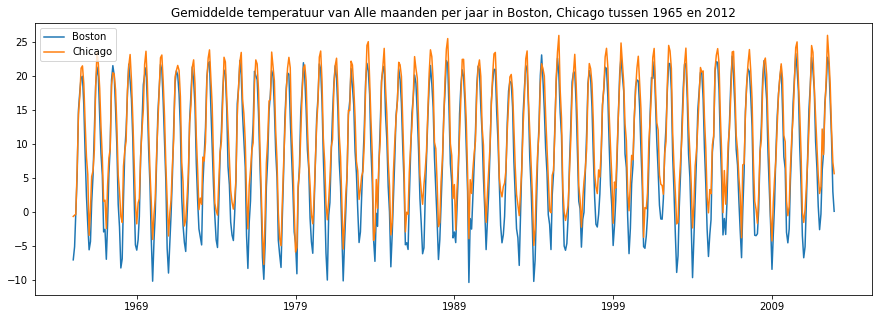

In [105]:
widgetsToFigure(steden=dropdown_Cities.value, maandIndex = slider_Maand.index, jaren = slider_Jaren.value)

## Your country to AverageTemperature between 1960 and 2015

Text(0.5,1,'Gemiddelde temperatuur van United States tussen 1970 en 2015')

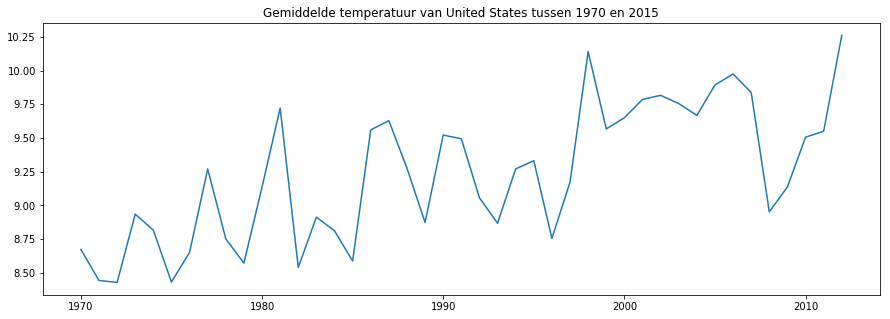

In [106]:
lalala = np.array(spark.sql("Select dt, avg(AverageTemperature) from table3 where country = '" + str(dropdown_Countries.value) + "' and dt between '1970-01-01' and '2015-12-31' and dt like '%-01%' group by dt order by dt").collect())
sum = 0
average = []
for i in range(len(lalala)):
    if lalala[i][1] != None:
        sum += lalala[i][1]
        if '-12-01'in str(lalala[i][0]):
            #print(sum / 12)
            average.append(sum / 12)
            sum = 0

fig2 = plt.figure(figsize=(15, 5))
plt2 = fig2.add_subplot(111)
plt2.plot([i for i in range(1970, 1970 + int(len(lalala) / 12))], average)
plt2.set_title("Gemiddelde temperatuur van " + str(dropdown_Countries.value) + " tussen 1970 en 2015")    
#plt.xticks(np.arange(1990, 1990 + int(len(lalala) / 12), step=1))
#plt.yticks(np.arange(8.5, 11.5, step=0.25))


## Population of your country between 1960 and 2015

Text(0,0.5,'Aantal inwoners')

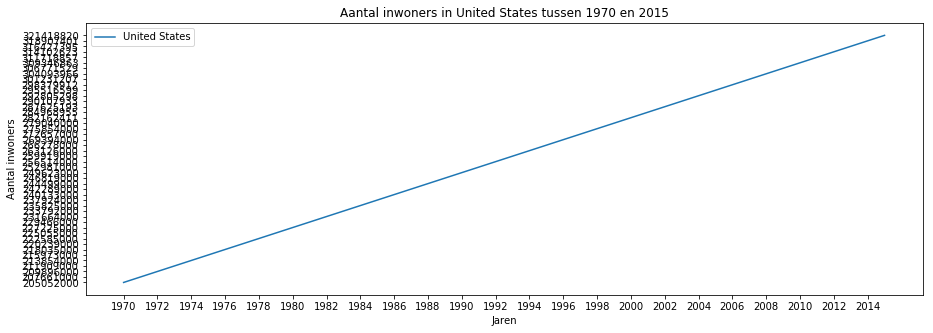

In [107]:
country = []
country.append(np.array(spark.sql("SELECT country, Y1970, Y1971, Y1972, Y1973, Y1974, Y1975, Y1976, Y1977, Y1978, Y1979, Y1980, Y1981, Y1982, Y1983, Y1984, Y1985, Y1986, Y1987, Y1988, Y1989, Y1990, Y1991, Y1992, Y1993, Y1994, Y1995, Y1996, Y1997, Y1998, Y1999, Y2000, Y2001, Y2002, Y2003, Y2004, Y2005, Y2006, Y2007, Y2008, Y2009, Y2010, Y2011, Y2012, Y2013, Y2014, Y2015 FROM table2 where Country like '" + str(dropdown_Countries.value) + "'").collect()))

fig3 = plt.figure(figsize=(15, 5))
plt3 = fig3.add_subplot(111)
for i in range(len(country[0])):
    plt3.plot([j for j in range(1970, 2015 + 1)], [country[0][i][j] for j in range(1, (len(country[0][i])))])
    plt3.legend([country[0][i][0] for i in range((len(country[0])))], loc='upper left')
plt.xticks(np.arange(1970, 2015 +1, step=2))
plt3.set_title("Aantal inwoners in " + str(dropdown_Countries.value) + " tussen 1970 en 2015")    

#plt.yticks(np.arange(9967379, 11285721, step=10))
#plt.yticks(np.arange(0, 50, step=1))

plt.xlabel('Jaren')
plt.ylabel('Aantal inwoners') 